In [1]:
import os
import sys
import copy
import time
import pickle
import numpy as np
import networkx as nx
sys.path.append('../../lib/')
import matplotlib.pyplot as plt
from frustration_graph import bqm_frustration

In [2]:
from dwave.system import DWaveSampler, EmbeddingComposite
import dimod
import dwave.inspector

In [3]:
# getting the QPU and defining an automation to automaticall map the problems on the QPU
qpu = DWaveSampler(profile="default")
sampler = EmbeddingComposite(qpu)

In [9]:
# Creating the BQM problem given L and ratio
L = 20
ratio = 0
save = 0
bqm = bqm_frustration(L, ratio, 0)

In [10]:
# Running the BQM problem on the QPU 
sampleset = sampler.sample(bqm, num_reads=100, 
                           label=f'Plot Ising Frustrato', annealing_time=1000, chain_strength=4)

In [11]:
# extracting the configuration with the lowest energy 
col_map = {}
pos = {}
for state, node in zip(sampleset.record[0][0], sampleset.variables):
    if state == 1:
        col_map[node] = [123/255, 180/255, 248/255]
    else:
        col_map[node] = 'white'
    split = node.split('-')
    x, y = int(split[0]), int(split[1])
    pos[node] = (y, -x)

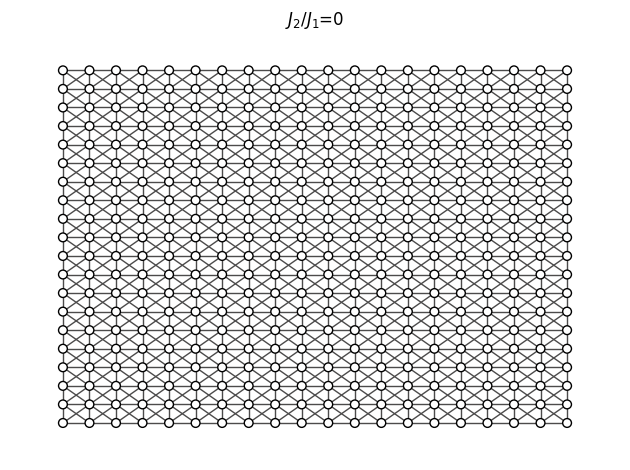

In [12]:
# plotting the configuration

G = dimod.to_networkx_graph(bqm)

node_col = []
for node in G.nodes:
    node_col.append(col_map[node])

#pos = {f'{x}-{y}':(y,-x) for x in range(L) for y in range(L)}
nx.draw_networkx_nodes(G, pos=pos, node_color=node_col, edgecolors='k', node_size=40)

nx.draw_networkx_edges(G, pos=pos, edge_color=[76/255, 75/255, 75/255])
plt.axis('off')
plt.title(rf"$J_2/J_1$={ratio}")
plt.tight_layout()
if save:
    string = f"striped_lattice_config_r{ratio}"
    string = string.replace('.', '')
    plt.savefig("../../Results/Ising_Frustrated/DWave/" + string, transparent=True)

In [13]:
dwave.inspector.show(sampleset)

Serving Inspector on https://18000-yellow-puffin-9814dwxb.ws.ide.dwavesys.io/?problemId=0c4781b4-c0a4-490f-863c-c79160c8e019

'https://18000-yellow-puffin-9814dwxb.ws.ide.dwavesys.io/?problemId=0c4781b4-c0a4-490f-863c-c79160c8e019'